##  What time of day are delays happening?

### Flights delayed which are arriving to LAX.

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Open and read files
flight_delay_dest = pd.read_csv("../clean/LAX_Dest_Flight_Delays_2016.csv")

# retrive and conver in to dataframe
flight_delay_dest = pd.DataFrame(flight_delay_dest)

flight_delay_dest.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,Carrier,TailNum,FlightNum,...,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CarrierName
0,2016,1,1,1,5,2016-01-01,AA,AA,N850AA,58,...,264.0,1.0,2504.0,11,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
1,2016,1,1,2,6,2016-01-02,AA,AA,N855AA,58,...,281.0,1.0,2504.0,11,0.0,0.0,0.0,24.0,8.0,American Airlines Inc.
2,2016,1,1,3,7,2016-01-03,AA,AA,N864AA,58,...,262.0,1.0,2504.0,11,30.0,0.0,0.0,0.0,6.0,American Airlines Inc.
3,2016,1,1,4,1,2016-01-04,AA,AA,N862AA,58,...,261.0,1.0,2504.0,11,1272.0,0.0,11.0,0.0,15.0,American Airlines Inc.
4,2016,1,1,5,2,2016-01-05,AA,AA,N859AA,58,...,251.0,1.0,2504.0,11,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
5,2016,1,1,6,3,2016-01-06,AA,AA,N865AA,58,...,253.0,1.0,2504.0,11,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
6,2016,1,1,7,4,2016-01-07,AA,AA,N861AA,58,...,287.0,1.0,2504.0,11,0.0,0.0,60.0,0.0,0.0,American Airlines Inc.
7,2016,1,1,8,5,2016-01-08,AA,AA,N857AA,58,...,281.0,1.0,2504.0,11,8.0,0.0,42.0,0.0,48.0,American Airlines Inc.
8,2016,1,1,9,6,2016-01-09,AA,AA,N863AA,58,...,284.0,1.0,2504.0,11,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
9,2016,1,1,10,7,2016-01-10,AA,AA,N850AA,58,...,271.0,1.0,2504.0,11,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.


In [3]:
df_deptime = flight_delay_dest[['DepTime','CarrierName','DepDel15']]
df_deptime = pd.DataFrame(df_deptime)
df_deptime.head()


,DepTime,CarrierName,DepDel15
0,1426.0,American Airlines Inc.,0.0
1,1502.0,American Airlines Inc.,1.0
2,1513.0,American Airlines Inc.,1.0
3,1155.0,American Airlines Inc.,1.0
4,1509.0,American Airlines Inc.,1.0


In [4]:
#Create bins for departure delays
delay_times = df_deptime.copy()

time_bin = np.array(['Early Morning(00:01am to 5:59am)','Morning(6:00am to 11:59am)','Noon(12:00pm to 5:59pm)', 'Evening(6:00pm to 23:59pm)'])
delay_times['Times'] = pd.cut(delay_times['DepTime'],[1.0, 600.0, 1200.0, 1800.0, 2400.0], labels=time_bin)

df = delay_times.groupby('Times')['DepDel15','CarrierName'].sum()
df.reset_index()

,Times,DepDel15
0,Early Morning(00:01am to 5:59am),594.0
1,Morning(6:00am to 11:59am),8274.0
2,Noon(12:00pm to 5:59pm),14320.0
3,Evening(6:00pm to 23:59pm),16973.0


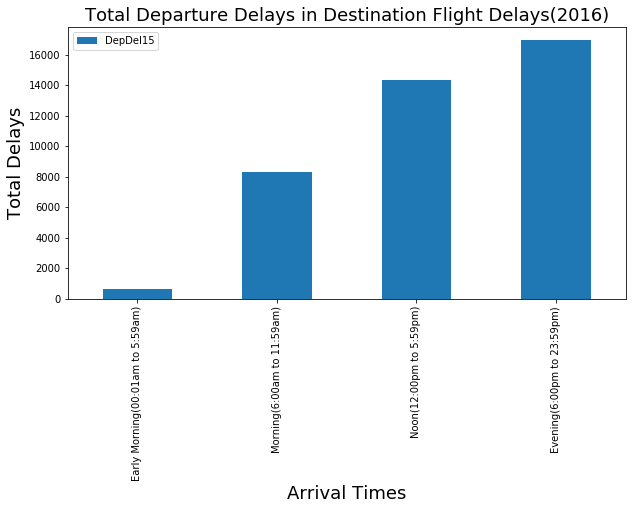

In [5]:
df.plot(kind='bar',figsize=(10,5))
plt.xlabel('Arrival Times',fontsize='18')
plt.ylabel('Total Delays',fontsize='18')
plt.title('Total Departure Delays in Destination Flight Delays(2016)',fontsize='18')
plt.show()

In [6]:
df_arrtime = flight_delay_dest[['ArrTime','CarrierName','ArrDel15']]
df_arrtime = pd.DataFrame(df_arrtime)
df_arrtime.head()

,ArrTime,CarrierName,ArrDel15
0,2116.0,American Airlines Inc.,0.0
1,2211.0,American Airlines Inc.,1.0
2,2215.0,American Airlines Inc.,1.0
3,1917.0,American Airlines Inc.,1.0
4,2143.0,American Airlines Inc.,0.0


In [7]:
#Create bins for arrival delays
delay_arr_times = df_arrtime.copy()

time_bin = np.array(['Early Morning(00:01am to 5:59am)','Morning(6:00am to 11:59am)','Noon(12:00pm to 5:59pm)', 'Evening(6:00pm to 23:59pm)'])
delay_arr_times['Times'] = pd.cut(delay_arr_times['ArrTime'],[1.0, 600.0, 1200.0, 1800.0, 2400.0], labels=time_bin)
df3 = delay_arr_times.groupby('Times')['ArrDel15','CarrierName'].sum()
df3.reset_index()

,Times,ArrDel15
0,Early Morning(00:01am to 5:59am),3848.0
1,Morning(6:00am to 11:59am),9481.0
2,Noon(12:00pm to 5:59pm),13785.0
3,Evening(6:00pm to 23:59pm),21887.0


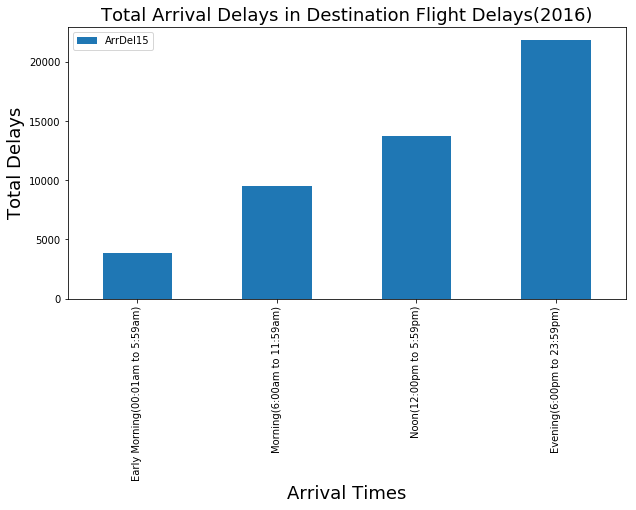

In [8]:
df3.plot(kind='bar',figsize=(10,5))
plt.xlabel('Arrival Times',fontsize='18')
plt.ylabel('Total Delays',fontsize='18')
plt.title('Total Arrival Delays in Destination Flight Delays(2016)',fontsize='18')
plt.show()

In [9]:
join_df1 = df3.join(df)
join_df1 = join_df1.rename(columns={'ArrDel15':'Arrival Delay','DepDel15':'Departure Delay'})

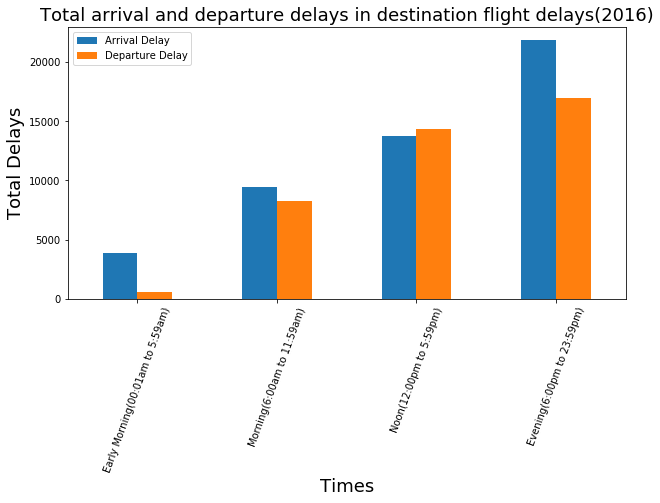

In [10]:
# plotting which time of the day delays happening in arrival and departure delays.
join_df1.plot(kind='bar',figsize=(10,5))
plt.xlabel('Times',fontsize='18')
plt.ylabel('Total Delays',fontsize='18')
plt.title('Total arrival and departure delays in destination flight delays(2016)',fontsize='18')
plt.xticks(rotation=70)
plt.savefig('DestFlights_Arr and Dep during day')
plt.show()